In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()
import scipy.stats, scipy.special

# Дано:

In [2]:
years = 9
k1 = 1.8
k2 = 1.24
k3 = 1.15
k4 = k1

one_year = 3.154*10**7
tau_r = years * one_year

# Списки вероятностей безотказной работы объединенные по закону распределения
p_exp = np.array([0.981, 0.991, 0.994, 0.976, 0.996])
p_norm = np.array([0.978])
p_l_norm = np.array([0.964])

# Решение:

Введём некоторые функции для поиска параметров случайных распределений. Они дублируют решение выполненное в MathCad и нужны для избежания потери точности рассчетов и для векторизации вычислений.

In [3]:
# Функция поиска параметра lambda, эксп. закона распределения:
def find_lamb_exp(p_i):
    return (-1/tau_r)*(np.log(p_i))

# Функция поиска времени безотказной работы эксп. закона распределения:
def norm_exp(x_i, lamb_i):
    return (-1/lamb_i)*np.log(x_i)

# Функция поиска параметра sigma, норм. закона распределения:
def find_sig_norm(p_i, k):
    return (tau_r - k*tau_r)/(scipy.special.ndtri(1-p_i))

# Функция поиска времени безотказной работы норм. закона распределения:
def norm(x_i, sig_i, k):
    return (scipy.special.ndtri(1-x_i))*sig_i + k*tau_r

# Найдем параметр sigma(zi) в MathCad и вычислим остальные параметры для логнормального распределения P4i:
sig_zi = 0.30145307552088571247
m_zi = np.log(k1*tau_r)-(sig_zi ** 2 / 2)
sig_ti = ((np.exp(sig_zi ** 2) - 1) * np.exp(2 * m_zi + sig_zi ** 2)) ** (1 / 2)

# Функция поиска времени безотказной работы логнормального закона распределения:
def log_norm(x_i):
    return np.exp(scipy.special.ndtri(1-x_i)*sig_zi + m_zi)

Проверим функции.

In [4]:
lamb_exp = find_lamb_exp(p_exp)
# print(lamb_exp)
print('Выполним проверку найденных данных:', end='\n\n')
print('Эксп. закон: Ti при Xi=Pi (Должно быть равно tau_r)', norm_exp(p_exp, lamb_exp), end='\n\n')

print('Норм. закон: Ti при Xi=Pi=0.978 (Должно быть равно tau_r)', norm(p_norm, find_sig_norm(p_norm, k1), k1), end='\n\n')

print('Лог.норм. закон: Ti при Xi=Pi=0.964 (Должно быть равно tau_r)', log_norm(p_l_norm), end='\n\n')

print('tau_r =', tau_r)

Выполним проверку найденных данных:

Эксп. закон: Ti при Xi=Pi (Должно быть равно tau_r) [2.8386e+08 2.8386e+08 2.8386e+08 2.8386e+08 2.8386e+08]

Норм. закон: Ti при Xi=Pi=0.978 (Должно быть равно tau_r) [2.8386e+08]

Лог.норм. закон: Ti при Xi=Pi=0.964 (Должно быть равно tau_r) [2.8386e+08]

tau_r = 283860000.0


# Генерация

Используя стандартный равномерный генератор псевдослучайных чисел, сгенерируем матрицу (22$*$n) для использования в дальнейших рассчетах. Генератор имеет период $2^{128}$.

Можно заметить, что распределение случайных величин равномерно в промежутке [0:1] для каждого элемента.
А значит генератор удовлетворяет требованиям.


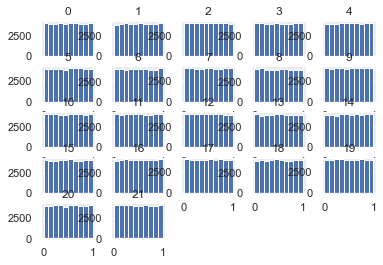

In [5]:
# Инициализация генератора
rg = np.random.default_rng()
# Зададим количество итераций:
n = 40000
# Генерация 22 рядов по n итераций случайных величин равномерно распределенных в промежутке [0,1]
j = rg.random((22, n))
# Создадим списки вероятностей безотк.раб. для элементов подгрупп:
p_1 = np.array([0.978])
p_2 = np.array([0.981, 0.981, 0.981, 0.991, 0.994])
p_3 = np.array([0.976, 0.976, 0.976, 0.976, 0.976, 0.976, 0.976, 0.976, 0.976, 0.976, 0.996, 0.996, 0.996])
p_4 = np.array([0.964, 0.964, 0.964])
J_test = pd.DataFrame(j.T)
J_test.hist()
print('Можно заметить, что распределение случайных величин равномерно в промежутке [0:1] \
для каждого элемента.\nА значит генератор удовлетворяет требованиям.')

1. Определим время безотказной работы элементов 1-й подсистемы для всех итераций:

Элемент #1.1: 0.978125

Рассмотрим график распределения для проверки распределения сл. величины на "нормальность": 


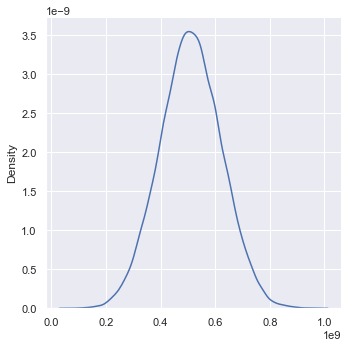

In [6]:
lamb_1 = find_sig_norm(p_1, k1)
pods_1 = norm(j[0,:], lamb_1, k1)

# Проверка на соответствие заданной вероятности безотказной работы:
print('Элемент #1.1:', (pods_1>tau_r).mean())
print('\nРассмотрим график распределения для проверки распределения сл. \
величины на "нормальность":','\n', sns.displot(pods_1, kind='kde'))

# Введём ограничение на максимальное время работы элементов (выполняется после отрисовки графика):
np.place(pods_1, (pods_1>tau_r*k1), tau_r*k1)

2. Определим время безотказной работы элементов 2-й подсистемы для всех итераций:

Элемент #2.1: 0.980025
Элемент #2.2: 0.98135
Элемент #2.3: 0.980475
Элемент #2.4: 0.990225
Элемент #2.5: 0.9935

Рассмотрим график одного из распределений для проверки на "эксп. нормальность": 


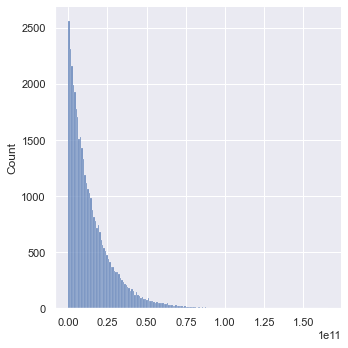

In [7]:
lamb_2 = find_lamb_exp(p_2)
pods_2 = np.empty((lamb_2.shape[0], (j.shape[1])))

for k in range(p_2.shape[0]):
      pods_2[k] = norm_exp(j[1+k,:], lamb_2[k])[np.newaxis, :]

# Проверка на соответствие заданной вероятности безотказной работы:
for k in range(pods_2.shape[0]):
    print(f'Элемент #2.{k+1}:', (pods_2[k]>tau_r).mean())

print('\nРассмотрим график одного из распределений для проверки \
на "эксп. нормальность":','\n', sns.displot(pods_2[0], kind='hist'))

# Введём ограничение на максимальное время работы элементов (выполняется после отрисовки графика):
np.place(pods_2, (pods_2>tau_r*k2), tau_r*k2)

3. Определим время безотказной работы элементов 3-й подсистемы для всех итераций:

Элемент #3.1: 0.975875
Элемент #3.2: 0.975275
Элемент #3.3: 0.976
Элемент #3.4: 0.975275
Элемент #3.5: 0.975075
Элемент #3.6: 0.9762
Элемент #3.7: 0.97705
Элемент #3.8: 0.976625
Элемент #3.9: 0.976525
Элемент #3.10: 0.9759
Элемент #3.11: 0.996275
Элемент #3.12: 0.995675
Элемент #3.13: 0.0

Рассмотрим график одной из величин для проверки распределения на "эксп. нормальность": 


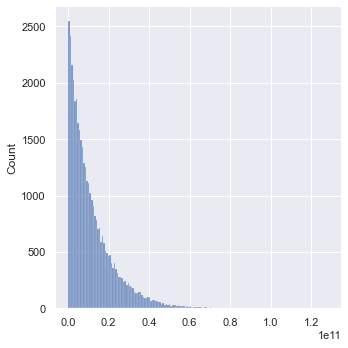

In [8]:
lamb_3 = find_lamb_exp(p_3[:-1])
pods_3 = np.empty((p_3.shape[0], (j.shape[1])))

for k in range(p_3.shape[0]-1):
      pods_3[k] = norm_exp(j[6+k,:], lamb_3[k])[np.newaxis, :]
pods_3[-1] = j[18]

# Проверка на соответствие заданной вероятности безотказной работы:
for k in range(pods_3.shape[0]):
    print(f'Элемент #3.{k+1}:', (pods_3[k]>tau_r).mean())
    
print('\nРассмотрим график одной из величин для проверки распределения \
на "эксп. нормальность":','\n', sns.displot(pods_3[0], kind='hist'))

# Введём ограничение на максимальное время работы элементов (выполняется после отрисовки графика):
np.place(pods_3, (pods_3>tau_r*k3), tau_r*k3)

4. Определим время безотказной работы элементов 4-й подсистемы для всех итераций:

Элемент #4.1: 0.965
Элемент #4.2: 0.963375
Элемент #4.3: 0.963275

Рассмотрим график одной из величин для проверки распределения сл. величины на "логнормальность": 


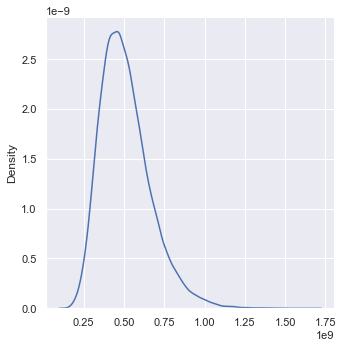

In [9]:
pods_4 = log_norm(j[-3:])
# Проверка на соответствие заданной вероятности безотказной работы:
for i in range(pods_4.shape[0]): print(f'Элемент #4.{i+1}:',(pods_4[i]>tau_r).mean())
    
print('\nРассмотрим график одной из величин для проверки распределения сл. \
величины на "логнормальность":','\n', sns.displot(pods_4[0], kind='kde'))
# Введём ограничение на максимальное время работы элементов (выполняется после отрисовки графика):
np.place(pods_4, (pods_4>tau_r*k4), tau_r*k4)

Для наглядности сформируем таблицу сгенерированных значений для всех элементов системы (с введенным ограничением на максимальное время безотказной работы):

In [10]:
System = pd.DataFrame(np.concatenate((pods_1[np.newaxis], pods_2, pods_3, pods_4), axis=0))
System.rename(index={0: '1.1', 1: '2.1', 2: '2.2', 3: '2.3', 4: '2.3хр', 5: 'П1',
                     6: '3.1', 7: '3.2', 8: '3.3', 9: '3.4', 10: '3.5', 11: '3.6',
                     12: '3.7', 13: '3.8', 14: '3.9', 15: '3.10', 16: '3.9хр', 17: '3.10хр',
                     18: 'П2', 19: '4.1', 20: '4.2', 21: '4.3'}, inplace=True)

In [11]:
System

,0,1,2,3,4,5,6,7,8,9,...,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999
1.1,5.109480e+08,4.548725e+08,5.109480e+08,5.109480e+08,4.916040e+08,5.109480e+08,5.109480e+08,5.109480e+08,5.109480e+08,5.109480e+08,...,4.919250e+08,5.109480e+08,4.304272e+08,4.902664e+08,5.109480e+08,5.109480e+08,3.391793e+08,5.058196e+08,4.988005e+08,4.890173e+08
2.1,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,...,3.519864e+08,6.631199e+07,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08
2.2,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,...,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08
2.3,3.519864e+08,3.519864e+08,5.177861e+07,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,...,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,1.478308e+08,3.519864e+08,3.519864e+08,3.519864e+08
2.3хр,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,...,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08
П1,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,...,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08,3.519864e+08
3.1,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,...,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08
3.2,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,2.742129e+07,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,...,3.264390e+08,1.620686e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08
3.3,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,...,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08
3.4,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,...,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08,3.264390e+08


Вероятности безотказной работы элементов

In [12]:
(System.T>=tau_r).mean()

1.1       0.978125
2.1       0.980025
2.2       0.981350
2.3       0.980475
2.3хр     0.990225
П1        0.993500
3.1       0.975875
3.2       0.975275
3.3       0.976000
3.4       0.975275
3.5       0.975075
3.6       0.976200
3.7       0.977050
3.8       0.976625
3.9       0.976525
3.10      0.975900
3.9хр     0.996275
3.10хр    0.995675
П2        0.000000
4.1       0.965000
4.2       0.963375
4.3       0.963275
dtype: float64

Отдельная проверка элемента П2:

In [13]:
(System.T['П2']<0.996).mean()

0.995725

# Переход к работе с алгоритмами.

По-возможности будут использоваться функции и методы библиотеки NumPy, дабы ускорить работу алгоритма (матричные операции много быстрее, в сравнении с простыми циклами).

Создание таблицы для занесения в неё времени работы элементов определяющих минимальное время безотказной работы подсистем 1-4 при j-й итерации:

In [14]:
T = pd.DataFrame(columns=['T1_j', 'T2_j', 'T3_j', 'T4_j'])
T.index.name = 'j'

1. Занесение в таблицу времени безотказной работы 1-й подсистемы:

In [15]:
T.T1_j = pods_1
# Предпросмотр таблицы минимального времени безотказной работы подсистем (первые 5 строк).
T.head()

,T1_j,T2_j,T3_j,T4_j
j,,,,
0,5.109480e+08,NaN,NaN,NaN
1,4.548725e+08,NaN,NaN,NaN
2,5.109480e+08,NaN,NaN,NaN
3,5.109480e+08,NaN,NaN,NaN
4,4.916040e+08,NaN,NaN,NaN


2. Исполнение алгоритма по поиску времени безотказной работы 4-й подсистемы:

In [16]:
T.T4_j = np.fmax(np.fmin(pods_4[0], pods_4[1]), pods_4[2])
# Предпросмотр таблицы минимального времени безотказной работы подсистем (первые 5 строк).
T.head()

,T1_j,T2_j,T3_j,T4_j
j,,,,
0,5.109480e+08,NaN,NaN,5.109480e+08
1,4.548725e+08,NaN,NaN,5.109480e+08
2,5.109480e+08,NaN,NaN,5.109480e+08
3,5.109480e+08,NaN,NaN,5.109480e+08
4,4.916040e+08,NaN,NaN,2.868966e+08


3. Исполнение алгоритма по поиску времени безотказной работы 2-й подсистемы:

In [17]:
# Объявляем вектор А, который удовлетворяет условию: A = MIN{t2.1_j, t2.2_j}:
A = np.fmin(pods_2[0], pods_2[1])

In [18]:
# Опишем правило выделения элементов из вектора А, которые: 
# 1) меньше tau_r; 
# 2) для своей итерации имеют t2.3хр_j, БОЛЬШИЙ чем соответствующий элемент из списка А. 

cond_1 = (tau_r > A) & (pods_2[3] >= A)

In [19]:
# Введём условия для определения (t2.3_j >= tП1_j), и объединим с предыдущим условием.
A_plus_tP = pods_2[2] >= pods_2[4]
A_plus_t23 = np.logical_not(A_plus_tP)

A_plus_t23 = cond_1 & A_plus_t23
A_plus_tP = cond_1 & A_plus_tP

In [20]:
# Используем принятые правила как маску для манипуляций с элементами вектора А:
np.place(A, A_plus_t23, (A[A_plus_t23]+pods_2[2][A_plus_t23]))
np.place(A, A_plus_tP, (A[A_plus_tP]+pods_2[4][A_plus_tP]))

In [21]:
# Внесём вектор времени безотказной работы второй подсистемы в таблицу. И выведем первые 5 строк из таблицы.
T.T2_j = A

In [22]:
# Предпросмотр таблицы минимального времени безотказной работы подсистем (первые 5 строк).
T.head()

,T1_j,T2_j,T3_j,T4_j
j,,,,
0,5.109480e+08,351986400.0,NaN,5.109480e+08
1,4.548725e+08,351986400.0,NaN,5.109480e+08
2,5.109480e+08,351986400.0,NaN,5.109480e+08
3,5.109480e+08,351986400.0,NaN,5.109480e+08
4,4.916040e+08,351986400.0,NaN,2.868966e+08


4. Исполнение алгоритма по поиску времени безотказной работы 3-й подсистемы:

In [23]:
# Данная ячейка несёт в себе отладочные данные использованные во время написания алгоритма.

# pods_3t = np.array(pods_3.T[:2])
# pods_3t[1][2] = 3.26439000e+07
# pods_3t[1][1] = 1
# pods_3t[1][3] = 1
# pods_3t[1]

In [24]:
# Соберём дополнительную таблицу(матрицу) запасных элементов и их времен хранения, транспонируем матрицу для удобства:
zapas = np.array(pods_3[8:12])
zapas = zapas.T

x = np.array(pods_3.T)

# Реализация алгоритма для поиска минимального времени работы подсистемы 3 по соответствующей блок-схеме:

for i in range(x.shape[0]):
    if x[i][:7].min() < tau_r:
        if x[i][12] < p_3[12]:
            if x[i][:7].min() < zapas[i][2]:
                x[i][x[i][:7].argmin()] = x[i][:7].min() + zapas[i][0]
            if x[i][:7].min() < tau_r:
                if x[i][:7].min() < zapas[i][3]:
                    x[i][x[i][:7].argmin()] = x[i][:7].min() + zapas[i][1]


T.T3_j = np.amin(x.T[:7], axis=0)

Получаем таблицу минимального времени работы всех подсистем:

In [25]:
T

,T1_j,T2_j,T3_j,T4_j
j,,,,
0,5.109480e+08,351986400.0,3.264390e+08,5.109480e+08
1,4.548725e+08,351986400.0,3.264390e+08,5.109480e+08
2,5.109480e+08,351986400.0,3.264390e+08,5.109480e+08
3,5.109480e+08,351986400.0,3.264390e+08,5.109480e+08
4,4.916040e+08,351986400.0,3.264390e+08,2.868966e+08
...,...,...,...,...
39995,5.109480e+08,351986400.0,3.241540e+08,4.611140e+08
39996,3.391793e+08,351986400.0,3.264390e+08,4.997165e+08
39997,5.058196e+08,351986400.0,3.264390e+08,5.109480e+08


# Найдём искомые параметры

In [26]:
T_sas = (T.min(axis=1)).mean()

In [27]:
P = (T.min(axis=1)>=tau_r).mean()

Итого имеем $\hat{T}_{cac}$, и $\hat{P}$:

In [28]:
T_sas

322874351.3872165

In [29]:
P

0.97335

Произведём проверку точности

In [30]:
gamma = 0.997
d_1 = d_2 = 0.003

In [31]:
t_gamma = scipy.special.ndtri((1+gamma)/2)

In [32]:
delta_1 = (t_gamma/P)*(np.sqrt((P*(1-P))/n))
delta_1

0.0024553287046343067

In [33]:
summ = (T.min(axis=1)-T_sas).sum()**2
delta_2 = (t_gamma/T_sas)*np.sqrt((1/(n*(n-1)))*(summ))
delta_2

7.242841609246222e-17

In [34]:
if delta_1 < d_1:
    print(f'Нужная точность достигнута delta_1 = {delta_1}')
else:
    print(f'Точность не достигнута delta_1 = {delta_1}')
if delta_2 < d_2:
    print(f'Нужная точность достигнута delta_2 = {delta_2}')
else:
    print(f'Точность не достигнута delta_2 = {delta_2}')

Нужная точность достигнута delta_1 = 0.0024553287046343067
Нужная точность достигнута delta_2 = 7.242841609246222e-17
